### Loading the AirPassengers dataset

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import os

# Define the URL and local filename
dataset_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
local_filename = 'airline-passengers.csv'

# Download the dataset if it doesn't already exist
if not os.path.exists(local_filename):
    !wget -q $dataset_url -O $local_filename
    print(f"Downloaded {local_filename}")
else:
    print(f"{local_filename} already exists. Skipping download.")

# Load the AirPassengers dataset from the local file
df = pd.read_csv(local_filename)
df.columns = ['Month', 'Passengers']
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m') # Specify format for correct parsing
df = df.set_index('Month')

print("First 5 rows of the dataset:")
display(df.head())
print("\nDataset Information:")
display(df.info())

Downloaded airline-passengers.csv
First 5 rows of the dataset:


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


None

### Plot of the Original Time Series

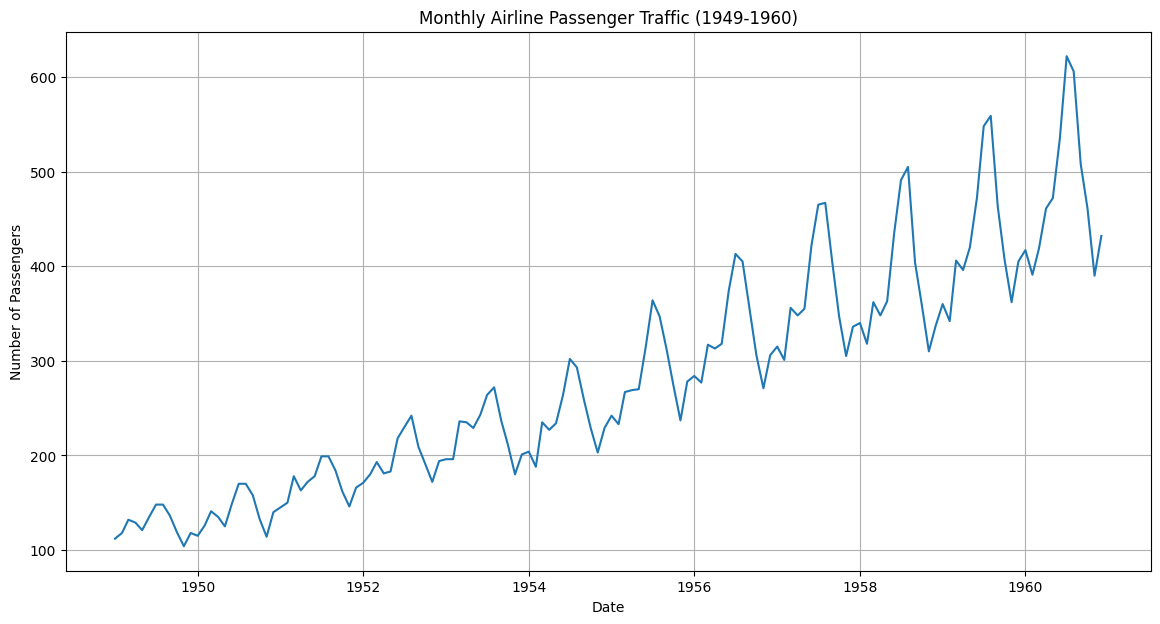

In [11]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x=df.index, y='Passengers')
plt.title('Monthly Airline Passenger Traffic (1949-1960)')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()

### Augmented Dickey-Fuller (ADF) Test on the Original Series

In [12]:
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Number of Lags Used: {result[2]}')
    print(f'Number of Observations Used: {result[3]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

    if result[1] <= 0.05:
        print("Conclusion: The series is likely stationary (reject H0).")
    else:
        print("Conclusion: The series is likely non-stationary (fail to reject H0).")

adf_test(df['Passengers'])

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Number of Lags Used: 13
Number of Observations Used: 130
Critical Values:
   1%: -3.4816817173418295
   5%: -2.8840418343195267
   10%: -2.578770059171598
Conclusion: The series is likely non-stationary (fail to reject H0).
